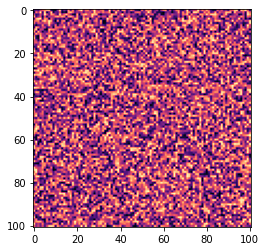

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# parametros
nt = 101
nx = 101
ny = 101
dx = 1
dy = 1
dt = 0.1
c = 0.1

u0 = np.random.randint((nx,ny)) - 0.5 * 0.1
u = np.zeros((nx,ny))

u0 = c + np.random.rand(nx,ny)


def cahn_hilliard(u0, u):
    for i in range(nt):
        u = np.copy(u0)
        for x in range(1, nx-1):
            for y in range(1, ny-1):
                u[x,y] = dt * ((u0[x+1, y] - 2 * u0[x, y] + u0[x-1, y]) / dx**2 
                               + (u0[x, y+1] - 2 * u0[x, y] + u0[x, y-1]) / dy**2) 
                + 2 * u0[x, y] - u0[x, y] ** 3

        u0 = np.copy(u)
        return u0, u





plt.imshow(u0, cmap='magma')
#plt.title('Concentração Inicial')
plt.show()

In [ ]:


def cahn_hilliard(u0, u):
    for i in range(nt):
        u = np.copy(u0)
        for x in range(1, nx-1):
            for y in range(1, ny-1):
                u[x,y] = dt * ((u0[x+1, y] - 2 * u0[x, y] + u0[x-1, y]) / dx**2 
                               + (u0[x, y+1] - 2 * u0[x, y] + u0[x, y-1]) / dy**2) 
                + 2 * u0[x, y] - u0[x, y] ** 3
    
     
        u0 = np.copy(u)
    #return u0, u




# Plot the result
#ax = data['u'].mean().plot(kind='seismic')
fig, ax = plt.subplots()
#plt.ylim([-100,100])
#plt.xlim([-100,100])
im = ax.imshow(u0, cmap='seismic')
plt.show()


In [ ]:
# passos de tempo
step_time = 1000

# plotar figuras nos seguintes passos de tempo
nfig = [0,10,50,100]
numfig = 0
fig = plt.figure(figsize=(8,7),dpi=90)
for n in range(step_time):
    u0, u = cahn_hilliard(u0,u)
    if n in nfig:
        numfig += 1
        print(n,numfig)
        ax = fig.add_subplot(220 + numfig)
        im = ax.imshow(u0, cmap='Reds')
        ax.set_title('{:.1f} s'.format(n))
fig.subplots_adjust(right=.8)

In [ ]:
# Time stepping
for t in range(int(nt)):
    u = cahn_hilliard(u, u0)
